In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
advert = pd.read_csv('https://downloader.disk.yandex.ru/disk/91b94196b737cfbb6120526af5bdca7e270ac18660b5454d1b41eba22977e2b3/6172c4a1/6fnHDOyrSPZDiJ5Q9pBJaKu-TwueqRAeVHrmNU5uHTpq8FWwMRMGbPVBcL4hwebMP9TU-af-w3jz_m8npbyAXA%3D%3D?uid=0&filename=conversion.csv&disposition=attachment&hash=qYVh3Uwb1hu7uN45I37WrKGp1wUh4rsBifVzisEuS6jPvXATSzdeBqzFvTXyVM/Wq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=60522&hid=69ef678f5ec63e885a9f99eb3d062e6a&media_type=spreadsheet&tknv=v2')

In [3]:
advert.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
advert.shape

(1143, 11)

In [5]:
advert.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

**How many unique ad campaigns have been ran?**

In [6]:
advert.xyz_campaign_id.nunique()

3

**Build a distribution plot of the number of Impressions (how many times users saw this ad) for each Facebook campaign by logarithm the values.**

In [7]:
df = np.log(advert.groupby('fb_campaign_id').Impressions.sum()).reset_index()
df.head()

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473


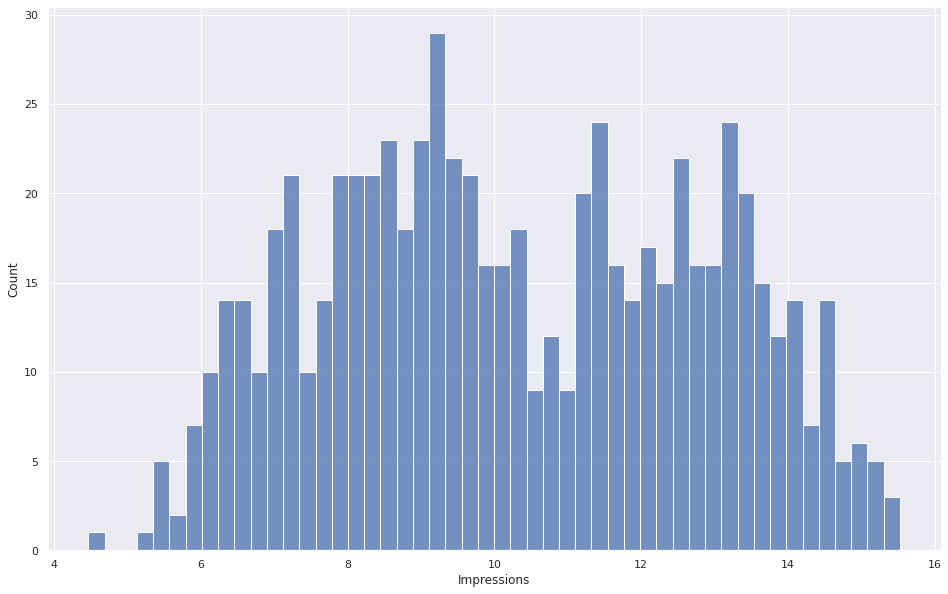

In [23]:
sns.histplot(x=df.Impressions, bins=50, kde=False)
sns.set(rc={'figure.figsize': (16,10)})

In [9]:
# Distribution is not normal
# Distribution is bimodal

**Now let's calculate some more useful metrics. The first is CTR (click-through rate), which shows the click-through rate, i.e. the ratio of the number of clicks to the number of impressions.**

$CTR =  \dfrac{clicks}{Impressions}$
 
**Create a new column, then look at descriptive statistics. What is the ad_id of the ad with the highest CTR?**

In [10]:
advert["CTR"] = advert.Clicks / advert.Impressions

In [11]:
advert.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [12]:
advert.sort_values("CTR", ascending=False).head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


**Visualize CTR by ad campaign number (xyz_campaign_id). Build a graph of the CTR distribution of the 916 campaign?**

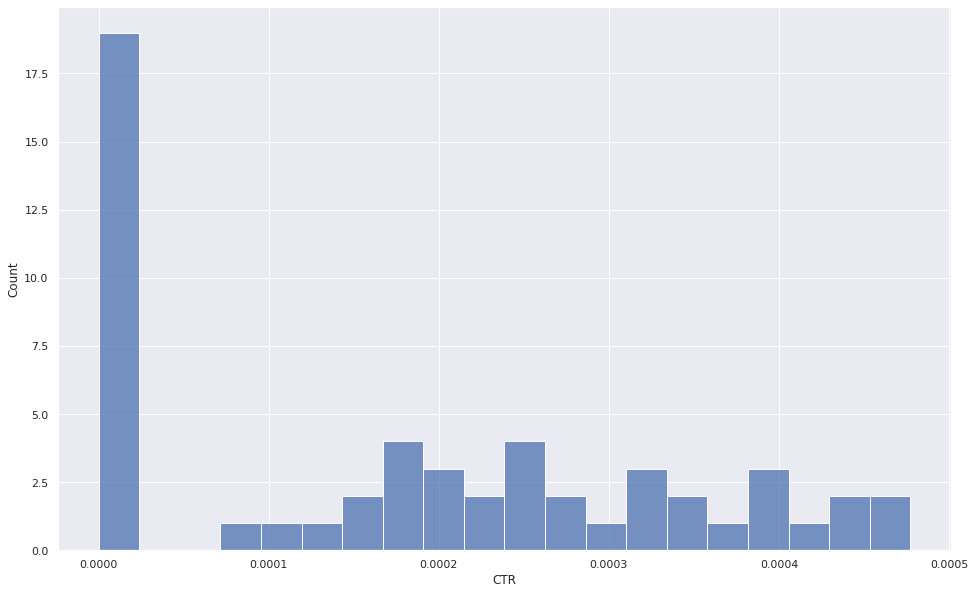

In [13]:
sns.histplot(advert.query('xyz_campaign_id == 916').CTR, bins=20)

**CPC is the cost per click of a user on an ad. It is calculated by dividing the amount of money spent by the total number of clicks:**     

$CPC = \dfrac{spent}{clicks}$    

**Print descriptive statistics for the new variable, look at the shape of the distribution. Indicate the interquartile range, rounded to two decimal places after the period.**

In [14]:
advert["CPC"] = advert.Spent / advert.Clicks

In [15]:
advert.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [16]:
advert.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [17]:
scipy.stats.iqr(advert.CPC, nan_policy='omit').round(2)

0.25

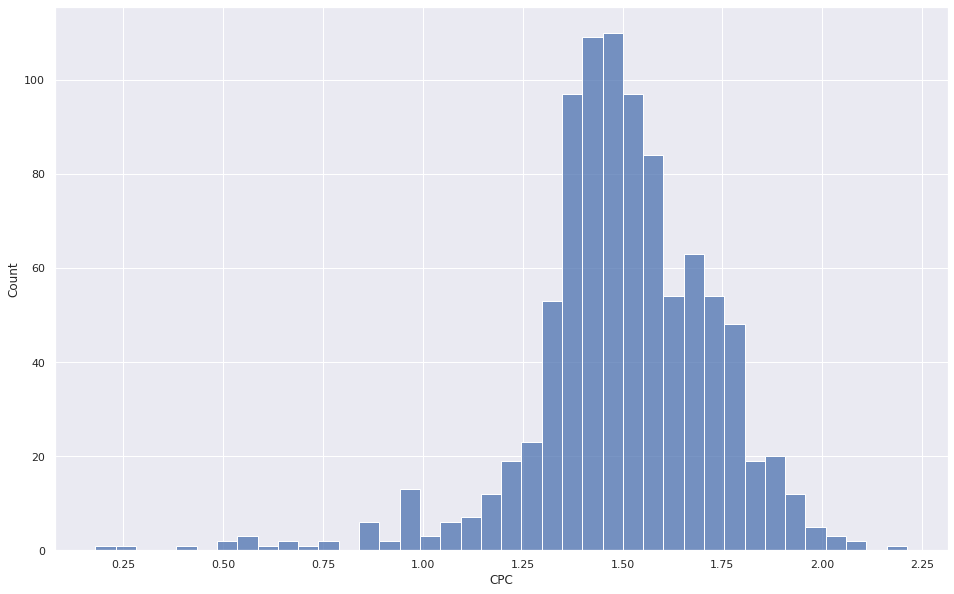

In [18]:
sns.histplot(advert.CPC.dropna())

**Visualize CPC by gender of users who were shown ads.**

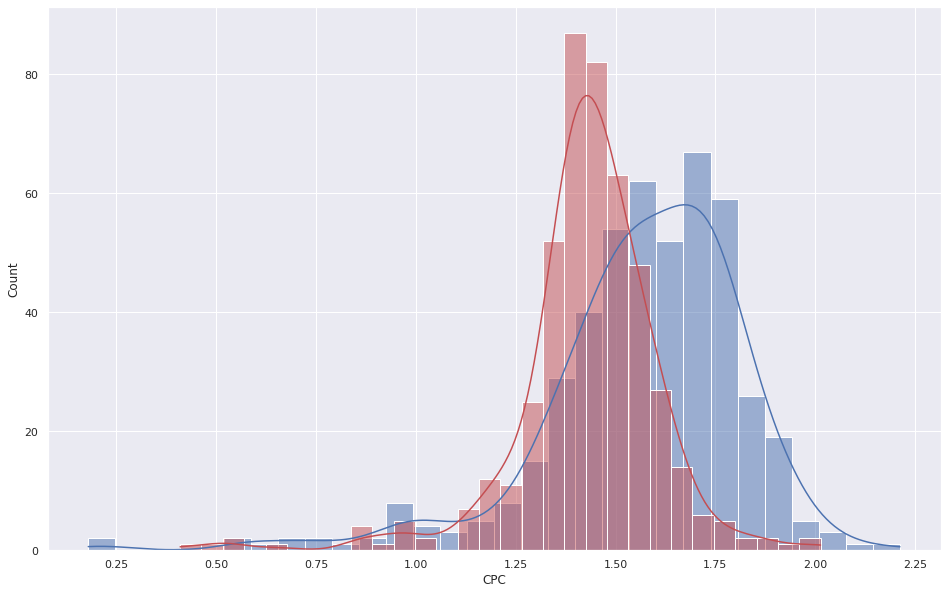

In [19]:
sns.histplot(advert.query('gender == "M"').CPC.dropna(), bins=30, kde=True)
sns.histplot(advert.query('gender == "F"').CPC.dropna(), bins=30, kde=True, color='r')

**Conversion (conversion rate) - the ratio of the number of users who performed the target action at a certain stage, to the total number of those who reached this stage.**

**Calculate the conversion from click to purchase. For your answer, specify the conversion rate for ad 1121814 as a percentage, rounded to 2 decimal places.**

In [20]:
advert["conversion_rate"] = advert.Approved_Conversion / advert.Clicks

In [21]:
advert.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


In [22]:
advert.query('ad_id == 1121814').conversion_rate.mul(100).round(2)

860    3.09
Name: conversion_rate, dtype: float64